In [10]:
%pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\ming\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes  # Alternative to Boston housing dataset

%matplotlib inline

In [12]:
# Load diabetes dataset (built-in sklearn alternative)
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Explore data
print(df.head())
df.describe()

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


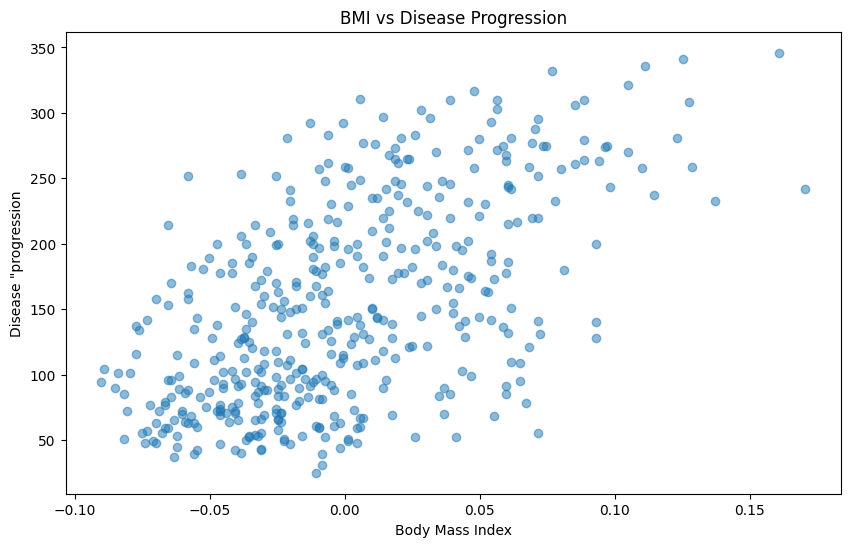

In [13]:
X = df['bmi'].values
y = df['target'].values

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.title('BMI vs Disease Progression')
plt.xlabel('Body Mass Index')
plt.ylabel('Disease "progression')
plt.show()

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

X_train = X_train.reshape(353, 1)
y_train = y_train.reshape(353, 1)
X_test = X_test.reshape(89, 1)
y_test = X_test.reshape(89, 1)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train.shape


Training samples: 353
Testing samples: 89
X_train shape: (353, 1)
y_train shape: (353, 1)


(353, 1)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print(f"Intercept (β₀): {model.intercept_.shape}")
print(f"Coefficient (β₁): {model.coef_[0].shape}")

# Display coefficients
print(f"Intercept (β₀): {model.intercept_[0]:.2f}")
print(f"Coefficient (β₁): {model.coef_[0][0]:.2f}")

Intercept (β₀): (1,)
Coefficient (β₁): (1,)
Intercept (β₀): 152.00
Coefficient (β₁): 998.58


In [16]:
# Create and train model
X_mean = np.mean(X_train)
y_mean = np.mean(y_train)

numerator = np.sum((X_train - X_mean) * (y_train - y_mean))
denominator = np.sum((X_train - X_mean) ** 2)

beta_1 = numerator / denominator
beta_0 = y_mean - beta_1 * X_mean

print(f"Manual Intercept (β₀): {beta_0:.2f}")
print(f"Manual Coefficient (β₁): {beta_1:.2f}")

Manual Intercept (β₀): 152.00
Manual Coefficient (β₁): 998.58


Mean Squared Error: 23390.38
Root Mean Squared Error: 152.94
R² Score: -10007623.23


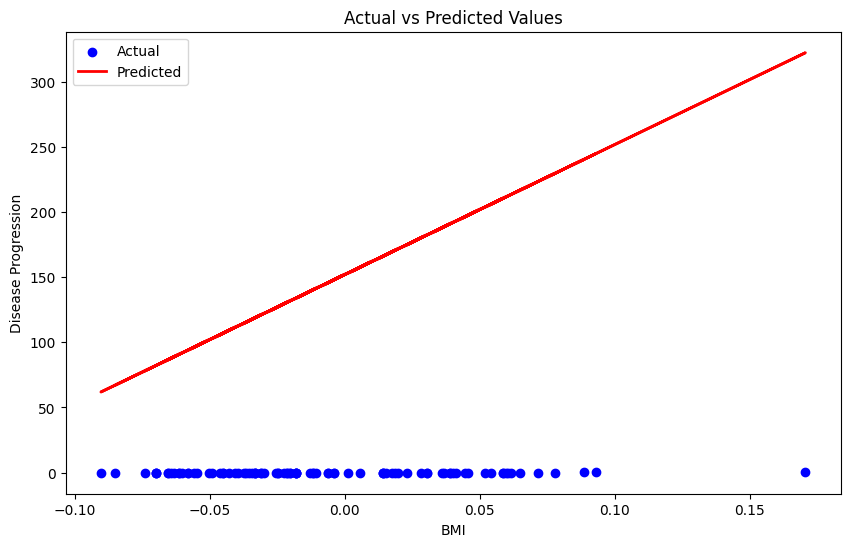

In [17]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visual evaluation
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()

In [24]:
X_multi = df.drop('target', axis=1)
y_multi = df['target']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)
y_pred_m = multi_model.predict(X_test_m)

print(f'Multiple regression r2 score:{r2_score(y_test_m, y_pred_m):.2f}')

coeff_df = pd.DataFrame({
    'Feature': data.feature_names,
    'Coefficient': multi_model.coef_
})

coeff_df.sort_values(by='Coefficient', ascending=False)


Multiple regression r2 score:0.45


,Feature,Coefficient
8,s5,736.198859
2,bmi,542.428759
5,s2,518.062277
3,bp,347.703844
7,s4,275.317902
6,s3,163.419983
9,s6,48.670657
0,age,37.904021
1,sex,-241.964362
4,s1,-931.488846


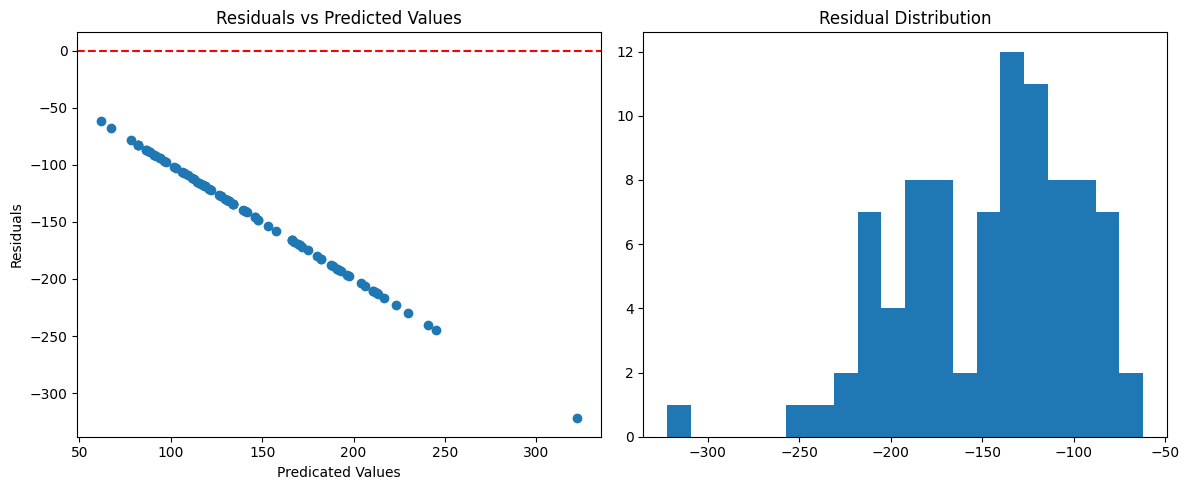

In [26]:

residuals = y_test - y_pred
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicated Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20)
plt.title('Residual Distribution')
plt.tight_layout()
plt.show()

